<a href="https://colab.research.google.com/github/talha1503/word2vec/blob/master/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [203]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import nltk
import os
import re
import operator

In [205]:
nltk.download('corpus')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading corpus: Package 'corpus' not found in index
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
base_path ='/content/drive/My Drive/Datasets/GOT_DATASET'

In [0]:
corpus=""
counter = 0
for text_file in os.listdir(base_path):
  # if counter == 2:
  #   break
  with open(base_path+'/'+text_file,'r') as txt_file:
      corpus+=txt_file.read().replace('\n','')
  break
  # counter+=1

In [0]:
# corpus=""
# from bs4 import BeautifulSoup
# import requests

# base_url = "https://en.wikipedia.org/wiki/Deep_learning"
# r = requests.get(base_url)
# soup = BeautifulSoup(r.content,'html.parser')

# paragraphs = soup.find_all('p')
# for paragraph in paragraphs:
#     corpus+=paragraph.text


In [0]:
# print(corpus)

In [0]:
from nltk.corpus import stopwords
def clean(text):
  text = text.lower()
  text = text.replace('“','')
  text = text.replace('”','')
  text = re.sub("hasn’t","has not",text)
  text = re.sub("can’t","can not",text)
  text = re.sub("wouldn’t","would not",text)
  text = re.sub("couldn’t","could not",text)
  text = re.sub("won’t","will not",text)
  text = re.sub("isn’t","is not",text)
  text = re.sub("i’ll","i will",text)
  text = re.sub("he’ll","he will",text)
  text = re.sub("she’ll","she will",text)
  text = re.sub("i’m","i am",text)
  text = re.sub("you’ll","you will",text)
  text = re.sub("hadn’t","had not",text)
  text = re.sub("don’t","do not",text)
  text = re.sub("here’s","here is",text)
  text = re.sub("where’s","where is",text)
  text = re.sub("that’s","that is",text)
  text = re.sub("it’s","it is",text)
  text = re.sub("he’s","he is",text)
  text = re.sub("she’s","she is",text)
  text = re.sub("what’s","what is",text)
  text = re.sub("i’ve","i have",text)
  text = re.sub("they’re","they are",text)
  text = re.sub("you’re","you are",text)
  text = re.sub("we’d","we would",text)
  text = re.sub("i’d","i would",text)
  text = re.sub(r'[^A-Za-z]',' ',text)
  text = text.split()
  text = [word for word in text if word not in set(stopwords.words('english'))]
  text = ' '.join(text)
  return text

In [241]:
from nltk.tokenize import sent_tokenize,word_tokenize
tp_corpus = sent_tokenize(corpus)
tp_corpus = tp_corpus[:5000]
tp_corpus = ' '.join(tp_corpus)
cleaned_corpus = clean(tp_corpus)
# print(cleaned_corpus[:50])
print(len(sent_tokenize(tp_corpus)))
# print(len(tp_corpus))
# print(tp_corpus[:5])

5000


In [242]:
all_words = word_tokenize(cleaned_corpus)
print(len(all_words))

37995


In [0]:
sentences  = sent_tokenize(tp_corpus)

cleaned_sentences = []
for sentence in sentences:
  cleaned_sentences.append(clean(sentence))  

In [213]:
print(cleaned_sentences[20:40])


['wore black wool gloves always complaining fingers frozen', 'bloody cold hunt said', 'bugger bear worth freezing go back emptyhand lark rumbled small paul brown whiskers covered face', 'lord commander would like ice big man squashed pug nose snot frozen', 'huge hand thick fur glove clenched tight around shaft spear bugger old bear said sisterman thin man sharp features nervous eyes', 'mormont dead daybreak remember', 'cares likes small paul blinked black little eyes', 'maybe forgotten chett thought stupid enough forget anything', 'kill old bear', 'go let think let us said lark', 'hunt us', 'want hunted great muttonhead said small paul', 'want', 'kill said lark yes huge man stamped butt spear frozen riverbank', '', 'hunt us sisterman took hands armpits turned chett', 'need kill officers say chett sick hearing', '', 'old bear dies blane shadow tower', 'grubbs aethan well ill luck drawing watch dywen bannen tracking ser piggy ravens']


In [214]:
all_words = list(set(all_words))
print("Total Vocabulary size is:",len(all_words))
print("Total number of sentences are:",len(cleaned_sentences))

Total Vocabulary size is: 6633
Total number of sentences are: 5000


In [0]:
def generate_data(window_size,all_words,cleaned_sentences):
  total_vocab = len(all_words)
  word2Ind = {word:i for i,word in enumerate(all_words)} 
  ind2Word = {i:word for i,word in enumerate(all_words)}
  x_train,y_train = [],[]
  for sent_index,sentence in enumerate(cleaned_sentences):
    for index,word in enumerate(sentence.split()):
      if word in set(all_words): 
        center_word_array = np.zeros(total_vocab)
        center_word_array[word2Ind[word]] = 1
        context_word_array = np.zeros(total_vocab)
        # print("center word: ",word)
        # print("Sentence is : ",sentence)
        for j in range(index-window_size,index+window_size+1):
          if j>=0 and j!=index and j<len(sentence.split()):
            if sentence.split()[j] in set(all_words):
              # print("Context word: ",sentence.split()[j])
              context_word_array[word2Ind[sentence.split()[j]]] = 1
        # data.append([center_word_array,context_word_array]) 
        x_train.append(center_word_array)
        y_train.append(context_word_array)

  return x_train,y_train,word2Ind,ind2Word

In [0]:
x_train,y_train,word_to_index,index_to_word = generate_data(2,all_words,cleaned_sentences)

In [0]:
# import pickle

# pickle.dump(x_train,open('x_train_word2vec.pkl','wb'))
# pickle.dump(y_train,open('y_train_word2vec.pkl','wb'))
# pickle.dump(word2Ind,open('word_to_index_word2vec.pkl','wb'))
# pickle.dump(ind2Word,open('index_to_word_word2vec.pkl','wb'))

In [218]:
np.seterr(divide='warn', invalid='warn',over='warn',under='warn')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'warn'}

In [0]:
def cosine_similarity(vector1,vector2):
  return (np.dot(vector_1,vector_2)/(np.linalg.norm(vector_1)*np.linalg.norm(vector_2)))

In [0]:
class Word2Vec():
  def __init__(self,dimensions,window_size,epochs,learning_rate,vocab_size,x_train,y_train,word2Ind,ind2Word):
    self.dimensions = dimensions
    self.window_size = window_size
    self.epochs = epochs
    self.learning_rate = learning_rate
    self.vocab_size = vocab_size
    self.x_train = x_train
    self.y_train = y_train
    self.word2Ind = word2Ind
    self.ind2Word = ind2Word

  def train(self):
    self.W1 = np.random.uniform(-1,1,(self.vocab_size,self.dimensions))
    self.W2 = np.random.uniform(-1,1,(self.dimensions,self.vocab_size))

    for i in range(self.epochs):
      self.loss = 0
      print("-"*80)
      for index,(x_train_sample,y_train_sample) in enumerate(zip(self.x_train,self.y_train)):
        y,u,h = self.forward(x_train_sample) 
        self.backward(y,h,x_train_sample,y_train_sample)
        context_words_included = 0
        for j in range(self.vocab_size):
          if y_train[index][j] == 1.0:
            self.loss+=(-1)*u[j]
            context_words_included+=1
        self.loss += context_words_included*np.log(np.sum(np.exp(u-u.max())))
        # self.loss += context_words_included*np.log(np.sum(u))
        # print("Loss is:",self.loss,end=" ")
        # print("Type is :",type(self.loss))
        # print("Training Example number--->",index)
      print("On Epoch:",i,end=" ")  
      print("Loss is:",self.loss)  

  def forward(self,x_input):print(corpus)
    h = np.dot(self.W1.T,x_input).reshape(self.dimensions,1)
    u = np.dot(self.W2.T,h).reshape(self.vocab_size,1)
    # u = np.log(np.max(u, 1e-9))

    # y = np.exp(u) / np.sum(np.exp(u), axis=0)print(corpus)
    y = self.exp_normalize(u)
    return y,u,h

  def exp_normalize(self,x):
    b = x.max()
    y = np.exp(x - b)
    return y / y.sum()


  def backward(self,y,h,x_train_sample,y_train_sample):    
    error = y - y_train_sample.reshape(self.vocab_size,1)
    dW2 = np.dot(h,error.T)
    dW1 = np.dot(x_train_sample.reshape(self.vocab_size,1),np.dot(self.W2,error).T)
    # dW1 = np.dot(self.W2,error)
    self.W1 = self.W1 - self.learning_rate*(dW1)
    self.W2 = self.W2 - self.learning_rate*(dW2)

  def return_vector(self,word):
    word_index = self.word2Ind[word]
    return self.W1[word_index]

  def most_similar(self,source_word,number_of_words=5):
    source_vector = self.return_vector(source_word)
    similarity_list = []
    for word,index in self.word2Ind.items():
      similarity_list.append((cosine_similarity(source_vector,self.return_vector(word)),word))
    similarity_list.sort(key = operator.itemgetter(0))
    required_words = similarity_list[:number_of_words+1]
    word_list = [word[1] for word in required_words]
    return word_list

In [0]:
w_vectors = Word2Vec(dimensions = 10,
                      window_size=2,
                      epochs=5,
                      learning_rate=0.01,
                      vocab_size=len(all_words),
                      x_train=x_train,
                      y_train=y_train,
                      ind2Word = index_to_word,
                      word2Ind = word_to_index
                     )

In [223]:
w_vectors.train()

--------------------------------------------------------------------------------
On Epoch: 0 Loss is: [742202.35237231]
--------------------------------------------------------------------------------
On Epoch: 1 Loss is: [666677.250956]
--------------------------------------------------------------------------------
On Epoch: 2 Loss is: [435114.9511188]
--------------------------------------------------------------------------------
On Epoch: 3 Loss is: [113152.39207066]
--------------------------------------------------------------------------------
On Epoch: 4 Loss is: [-694957.16513446]


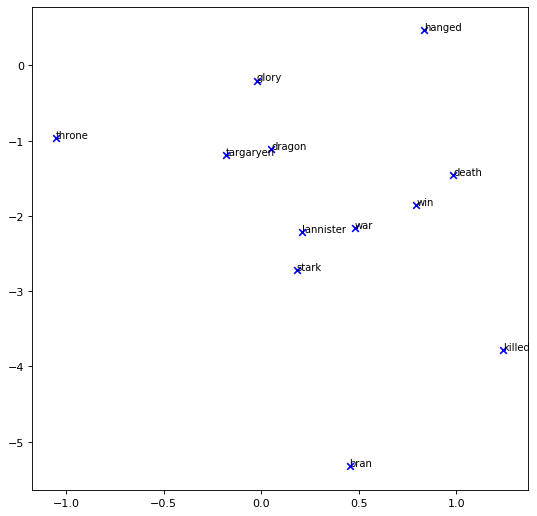

In [230]:
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE

width_in_inches = 8
height_in_inches = 8
dots_per_inch = 80

plt.figure(
          figsize=(width_in_inches, height_in_inches),
          dpi=dots_per_inch
          )

# num_words_to_plot = 20
# word_indices = np.random.randint(0,w_vectors.vocab_size,num_words_to_plot)
# for index in word_indices:
#   # word_embedding = w_vectors.return_vector(w_vectors.ind2Word[index]).reshape(-1,1)
#   # word_embedding = TSNE(n_components=2).fit_transform(word_embedding)
#   word_embedding = w_vectors.return_vector(w_vectors.ind2Word[index])
#   # print(word_embedding[0])
#   plt.scatter(word_embedding[5],word_embedding[6],marker='x',color='b')
#   plt.text(word_embedding[5],word_embedding[6],w_vectors.ind2Word[index],fontsize=9)

words_to_plot = ['stark','death','hanged','win','glory','lannister','war','throne','killed','bran','dragon','targaryen']
for word in words_to_plot:
  # word_embedding = w_vectors.return_vector(w_vectors.ind2Word[index]).reshape(-1,1)
  # word_embedding = TSNE(n_components=2).fit_transform(word_embedding)
  word_embedding = w_vectors.return_vector(word)
  plt.scatter(word_embedding[5],word_embedding[8],marker='x',color='b')
  plt.text(word_embedding[5],word_embedding[8],word,fontsize=9)


In [231]:
plt.savefig('output1.png')

<Figure size 432x288 with 0 Axes>